# IMAGE PROCESSING

## Segmentation

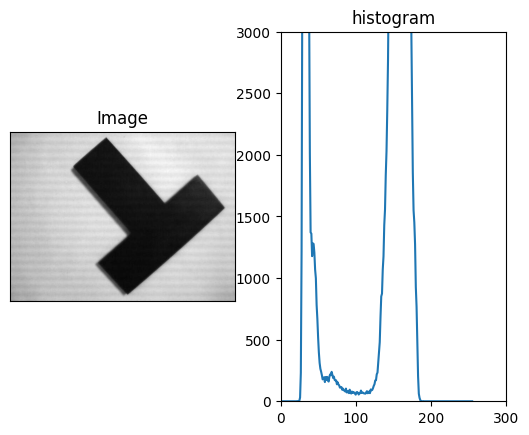

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def main():
    img = cv.imread('T.jpg',0)
    
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Image')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1,2,2)
    hist, bins = np.histogram(img.ravel(), 256,[0,255]) #ravel is flatten image
    plt.plot(hist)
    plt.title('histogram')
    plt.xlim(xmin=0, xmax=300)
    plt.ylim(ymin=0, ymax=3000)
    
    plt.show()
    
if __name__ == "__main__":
    main()

In [12]:
def main():
    img = cv.imread('T.jpg',0)
    
    x = cv.sumElems(img)
    
    print(x)
    
    plt.show()
    
if __name__ == "__main__":
    main()

(38681796.0, 0.0, 0.0, 0.0)


### Thresholding for Binarization

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


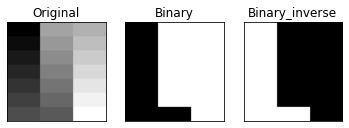

In [18]:
def main():
    img = cv.imread('gray21.512.tiff',1)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    th = 100
    max_val = 1
    
    ret, out1 = cv.threshold(img, th, max_val, cv.THRESH_BINARY)
    ret, out2 = cv.threshold(img, th, max_val, cv.THRESH_BINARY_INV)
    print(out1)
    
    images = [img, out1, out2]
    titles = ['Original', 'Binary', 'Binary_inverse']
    
    for i in range (len(images)):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], cmap= 'gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(titles[i])
    plt.show()
    
if __name__ == "__main__":
    main()

[[  0 103 102 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 [  0   0 107 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


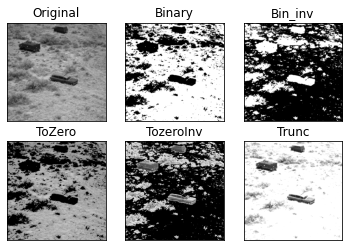

In [23]:
def main(): 
    img = cv.imread('7.1.10.tiff', 0)

    th =0
    max_val = 255
    
    ret, out1 = cv.threshold(img, th, max_val, cv.THRESH_BINARY + cv.THRESH_OTSU)
    ret, out2 = cv.threshold(img, th, max_val, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    ret, out3 = cv.threshold(img, th, max_val, cv.THRESH_TOZERO + cv.THRESH_OTSU)
    ret, out4 = cv.threshold(img, th, max_val, cv.THRESH_TOZERO_INV + cv.THRESH_OTSU)
    ret, out5 = cv.threshold(img, th, max_val, cv.THRESH_TRUNC + cv.THRESH_OTSU)
    print(out4)
    images = [img, out1, out2, out3, out4, out5]
    titles = ['Original', 'Binary', 'Bin_inv', 'ToZero', 'TozeroInv','Trunc']

    for i in range (len(images)):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], cmap= "gray")
        plt.xticks([])
        plt.yticks([])
        plt.title(titles[i])
    plt.show()
if __name__ == "__main__": 
    main()



172550
[[1 1 1 ... 1 1 1]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]]
4517.0
168033.0


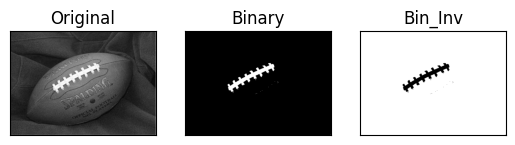

In [4]:
def main():
    img = cv.imread('09_football.jpg',1)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    w,h = img.shape
    total_size = w*h
    print(total_size)
    
    th = 200
    max_val = 1
    
    ret, out1 = cv.threshold(img, th, max_val, cv.THRESH_BINARY)
    ret, out2 = cv.threshold(img, th, max_val, cv.THRESH_BINARY_INV)
    print(out1)
    
    white_size = cv.sumElems(out1)
    
    print(white_size[0])
    
    object_size = total_size - white_size[0]
    
    print(object_size)
    
    images = [img, out1, out2]
    titles = ['Original', 'Binary', 'Bin_Inv']
    
    for i in range(len(images)):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(titles[i])
    plt.show()

if __name__ == "__main__":
    main()

## Enhancement

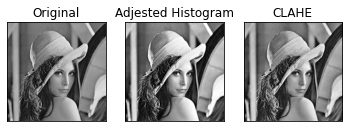

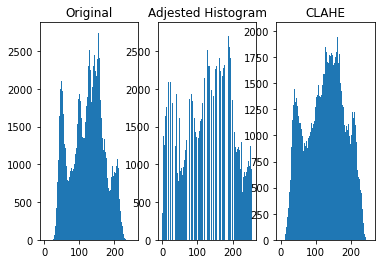

In [25]:
def main():
    img = cv.imread('4.2.04.tiff', 0)
    
    out1 = cv.equalizeHist(img)
    
    #clache = cv.createCLAHE()
    clache = cv.createCLAHE(clipLimit= 1.0,tileGridSize= (8,8))
    out2 = clache.apply(img)
    
    images = [img, out1, out2]
    titles = ['Original', 'Adjested Histogram', 'CLAHE']
    
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.hist(images[i].ravel(), 256,[0,255])
        plt.title(titles[i])
        
    plt.show()

if __name__ == "__main__":
    main()

## Filtering

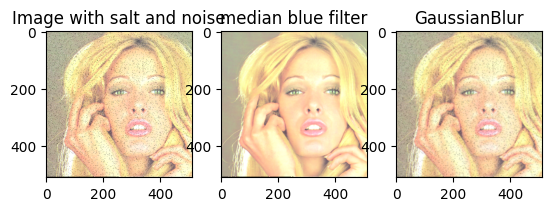

In [6]:
import random

def main():
    img = cv.imread('4.2.02.tiff',1)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    rows, columns, channels = img.shape
    p = 0.05
    
    output = np.zeros(img.shape, np.uint8)
    
    for i in range (rows):
        for j in range(columns):
            r = random.random() #float between 0 and 1
            if r < p/2:
                output[i][j] = [0,0,0] #peper sprinkled
            elif r < p:
                output [i][j] = [255,255,255]  #salt sprinkled
            else:
                output[i][j] = img[i][j]
    
    denoised = cv.medianBlur(output, 3)
    blur = cv.GaussianBlur(output, (5,5), 0)
    
    plt.subplot(1,3,1)
    plt.imshow(output)
    plt.title('Image with salt and noise')
    
    plt.subplot(1,3,2)
    plt.imshow(denoised)
    plt.title('median blue filter')
    
    plt.subplot(1,3,3)
    plt.imshow(blur)
    plt.title('GaussianBlur')
    
    plt.show()
    
if __name__ == "__main__":
    main()

[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00

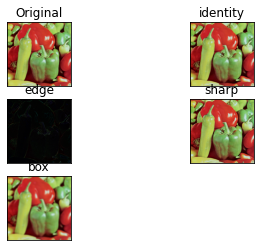

In [32]:
def main():
    img = cv.imread('4.2.07.tiff')
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    k = np.array(([0,0,0], [0,1,0], [0,0,0]) , np.float32)
    ed = np.array(([1,0,-1], [0,0,0], [-1,0,1]) , np.float32)
    sh = np.array(([0,-1,0], [-1,5,-1], [0,-1,0]) , np.float32)
    bo = np.array( np.ones ((11,11) , np.float32))/121    #3x3 not ok
    
#     print(bo)
#     print(type(k))
    
    iden = cv.filter2D(img, -1, k)
    edge = cv.filter2D(img, -1, ed)
    sharp = cv.filter2D(img, -1, sh)
    box = cv.filter2D(img, -1, bo)
    
    images = [img, iden, edge, sharp, box]
    titles = ['Original', 'identity', 'edge', 'sharp', 'box']
    
    for i in range (len(images)):
        plt.subplot(3,2,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(titles[i])
        
    plt.show()
    
if __name__ == "__main__":
    main()

In [7]:
def main():
    img = cv.imread('dave.jpg',1)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    sobelx = cv.Sobel(img,-1,1,0, ksize = 5)
    sobely = cv.Sobel(img,-1,0,1, ksize = 5)
    
    laplacian = cv.Laplacian(img, -1)
    sharpening = np.array ( ( [0,-1,0], [-1,5,-1], [0,-1,0]) , np.float32)
    sharp = cv.filter2D(img, -1, sharpening)
    
    titles = ['original', 'sobelx', 'sobely', 'laplacian', 'sharpen']
    images = [img, sobelx, sobely, laplacian, sharp]
    
    while True:
        cv.imshow('original', img)
        cv.imshow('sobel x', sobelx)
        cv.imshow('sobel y', sobely)
        cv.imshow('laplacian', laplacian)
        cv.imshow('sharpen', sharp)
        
        k =cv.waitKey(10)
        if k == 27:
            break
    cv.destroyAllWindows()
    
if __name__ == "__main__":
    main()